In [21]:
# read the csv
import pandas as pd
import matplotlib.pyplot as plt
from dataclean import clean_data as dc
import seaborn as sns

In [22]:
def read_data(fname: str) -> pd.DataFrame:
    dc(fname)
    data = pd.read_csv(fname)
    data['Time'] = (data['Time'] - data['Time'][0])/1000
    return data

In [23]:
tank1 = read_data('data/tank/data3.csv') # Depth from the Tank Room
tank2 = read_data('data/tank/data7.csv') # Depth from the Tank Room
tank3 = read_data('data/tank/data21.csv') # Depth from the Tank Room
tank4 = read_data('data/tank/data22.csv') # Depth from the Tank Room
tank5 = read_data('data/tank/data24.csv') # Depth from the Tank Room
tank6 = read_data('data/tank/data26.csv') # Depth from the Tank Room
tank7 = read_data('data/tank/data29.csv') # Depth from the Tank Room

Data cleaned successfully, 0 lines omitted.
Data cleaned successfully, 0 lines omitted.
Data cleaned successfully, 0 lines omitted.
Data cleaned successfully, 0 lines omitted.
Data cleaned successfully, 0 lines omitted.
Data cleaned successfully, 0 lines omitted.
Data cleaned successfully, 0 lines omitted.


In [24]:
phake = read_data('data/phake/data37.csv') # Depth from Phake Lake

Data cleaned successfully, 0 lines omitted.


In [25]:
dana = read_data('data/dana/data12.csv') # Depth from Dana Point

Data cleaned successfully, 0 lines omitted.


In [38]:
dana.columns

Index(['Time', ' Accel X [mg]', 'Accel Y [mg]', 'Accel Z [mg]',
       'dRoll [rad/s]', 'dPitch [rad/s]', 'dHeading [rad/s]', 'Roll [rad]',
       'Pitch [rad]', 'Yaw [rad]', 'Frequency Reader Frequency [Hz]',
       'Calibrated Velocity [m/s]', 'Pressure Sensor Depth [m]',
       'State Estimator X [m]', 'State Estimator Y [m]',
       'State Estimator Z [m]', 'State Estimator Roll [rad]',
       'State Estimator Pitch [rad]', 'State Estimator Yaw [rad]', 'Motor A',
       'Motor B', 'Motor C', 'Motor D', 'Motor E', 'Servo Angle [rad]',
       'Waypoint X [m]', 'Waypoint Y [m]', 'Waypoint Z [m]', 'Waiting [bool]'],
      dtype='object')

c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

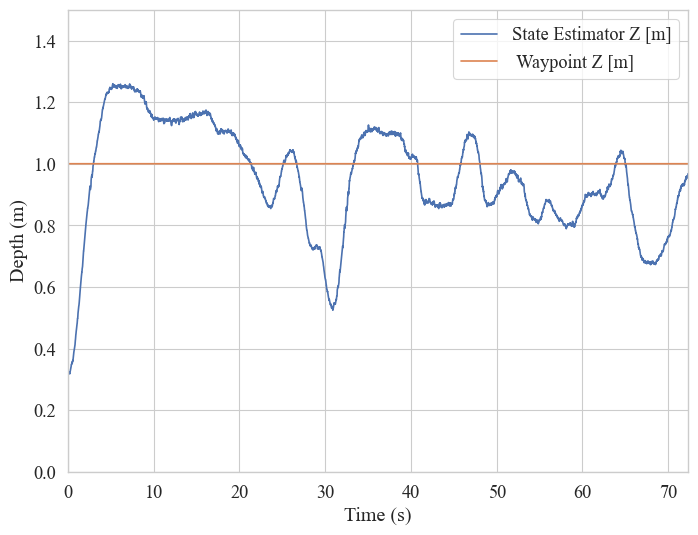

In [32]:
dataDf = tank5 # tank5 , dana
# plot the data using seaborn
sns.set_theme(style="whitegrid", context="paper", font_scale=1.5)
fig = plt.figure(figsize=(8, 6))

plt.rcParams["font.family"] = "Times New Roman"

# Calculate rolling average
rolling_avg = dataDf['State Estimator Z [m]'].rolling(window=10).mean()

sns.lineplot(x='Time', y=rolling_avg, data=dataDf, label='State Estimator Z [m]')
sns.lineplot(x='Time', y=' Waypoint Z [m]', data=dataDf, label=' Waypoint Z [m]')
plt.xlabel('Time (s)')
plt.ylabel('Depth (m)')
plt.legend()
plt.ylim(0, 1.5)
plt.xlim(0, max(dataDf['Time']))

# change the plt font to times new roman
plt.savefig('depth.png', dpi=1200)

c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


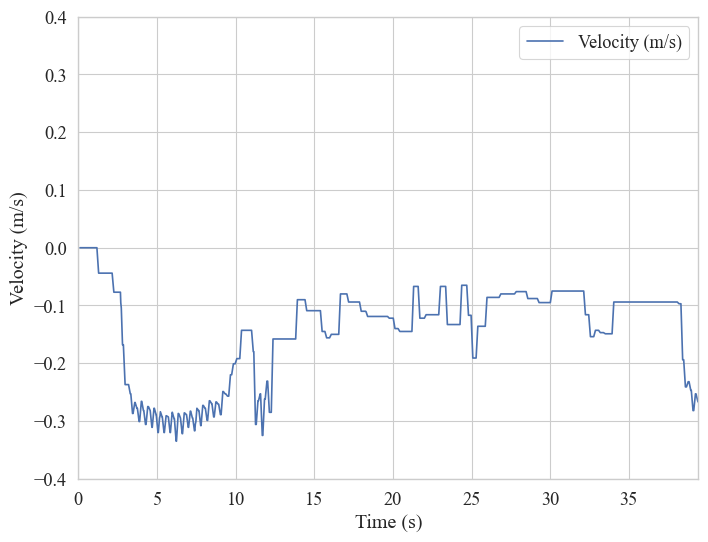

In [38]:
data = phake # phake, dana
sns.set(style="whitegrid", context="paper", font_scale=1.5)
plt.figure(figsize=(8, 6))

plt.rcParams["font.family"] = "Times New Roman"

# Calculate rolling average
rolling_avg = data['Calibrated Velocity [m/s]'].rolling(window=10).mean()

sns.lineplot(x='Time', y=rolling_avg, data=data, label='Velocity (m/s)')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.ylim(-0.4, 0.4)
plt.xlim(0, max(data['Time']))

plt.savefig('velocity.png', dpi=1200)
plt.show()


In [39]:
def normData(data):
  # set the waypoint x to 1.0, 2.0, 5.0, or 20.0 depending on whatever is closest to state estimator x)

  # get the maxVal based on the maximum or minimum value of the state estimator x
  maxVal = max(data["State Estimator X [m]"].max(), abs(data["State Estimator X [m]"].min()))
  if maxVal < 1.5:
    maxVal = 1.0
  elif maxVal < 2.5:
    maxVal = 2.0
  elif maxVal < 5.5:
    maxVal = 5.0
  else:
    maxVal = 20.0

  # normalize the data
  data['X'] = data["State Estimator X [m]"]/maxVal
  data['Y'] = data["State Estimator Y [m]"]/maxVal

  return data

1


c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


2


c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


3


c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vikra\miniconda3\envs\e80env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Done


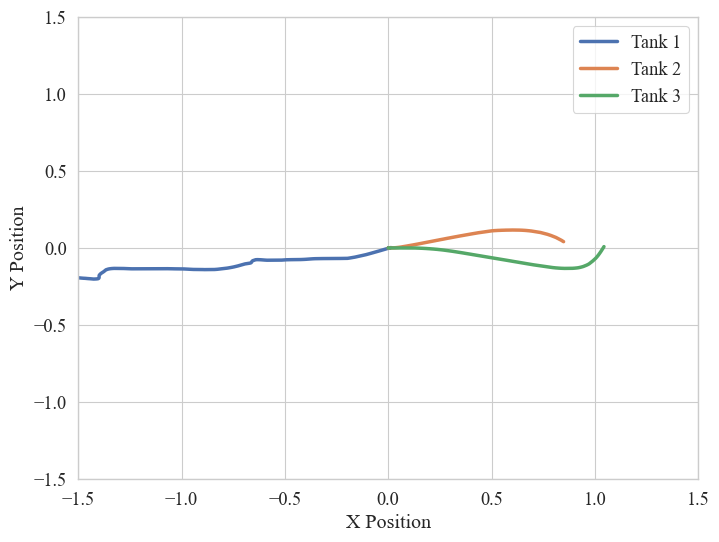

In [62]:
# plot the x and y position of the robot using seaborn

sns.set(style="whitegrid", context="paper", font_scale=1.5)
plt.figure(figsize=(8, 6))

plt.rcParams["font.family"] = "Times New Roman"

counter = 1
for dat in [tank2, tank4, tank3]: #2,3,4
  print(counter)
  data = dat
  data = normData(data)
  sns.lineplot(x='X', y='Y', data=data, label=f"Tank {counter}", linewidth=2.5)
  counter += 1

# sns.lineplot(x='X', y='Y', data=normData(dana), label='Dana Point', linewidth=2.5)

print("Done")
# plot the data
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.savefig('position.png', dpi=1200)
plt.show()

In [49]:
import math

In [58]:
abs(1-math.sqrt(tank2['X'].iloc[-1]**2 +  tank2['Y'].iloc[-1]**2))*100

95.0412121193877

In [59]:
abs(math.sqrt(tank4['X'].iloc[-1]**2 +  tank4['Y'].iloc[-1]**2)-1)*100

15.04293319564287

In [60]:
abs(math.sqrt(tank3['X'].iloc[-1]**2 +  tank3['Y'].iloc[-1]**2)-1)*100

4.403379255654372

In [61]:
abs(math.sqrt(dana['X'].iloc[-1]**2 +  dana['Y'].iloc[-1]**2)-1)*100

25.358601818941807

In [77]:
# find the point closest to (-1.0, 0) from dana['X'] and dana['Y']


def findClosestPoint(data):
  minVal = 100
  minIndex = 0
  for i in range(len(data)):
    val = math.sqrt((data['X'].iloc[i]+1)**2 +  data['Y'].iloc[i]**2)
    if val < minVal:
      minVal = val
      minIndex = i
  return minVal, minIndex

findClosestPoint(dana)[0]*100


9.53780373041928

In [93]:
data["State Estimator X [m]"].max()

8.209